In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# <font color='#FF8C00'>**ESCOLAS**</font>

In [2]:
escolas = pd.read_csv("TS_ESCOLA.csv", encoding = "ISO-8859-1", engine='python')
escolas.head()

,ID_SAEB,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_ESCOLA,ID_DEPENDENCIA_ADM,ID_LOCALIZACAO,PC_FORMACAO_DOCENTE_INICIAL,PC_FORMACAO_DOCENTE_FINAL,...,MEDIA_5EF_LP,MEDIA_5EF_MT,MEDIA_9EF_LP,MEDIA_9EF_MT,MEDIA_EMT_LP,MEDIA_EMT_MT,MEDIA_EMI_LP,MEDIA_EMI_MT,MEDIA_EM_LP,MEDIA_EM_MT
0,2019,1,11,1100015,2,11024666,3,2,100.0,64.4,...,184.83,210.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,1,11,1100015,2,11024682,2,1,100.0,80.4,...,223.45,245.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,1,11,1100015,2,11024828,3,1,100.0,48.9,...,158.06,194.74,239.76,244.94,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,1,11,1100015,2,11024968,2,1,NaN,NaN,...,NaN,NaN,NaN,NaN,306.34,313.39,NaN,NaN,306.34,313.39
4,2019,1,11,1100015,2,11025077,3,1,100.0,29.5,...,173.45,180.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### <font color='#DEB887'>**VERIFICANDO A DIMENSÃO DOS DADOS**</font>

In [3]:
escolas.shape

(70606, 137)

### <font color='#DEB887'>**VERIFICANDO A DEPENDÊNCIA ADMINISTRATIVA DAS ESCOLAS**</font>

In [4]:
escolas["ID_DEPENDENCIA_ADM"].value_counts()

3    44231
2    25861
1      514
Name: ID_DEPENDENCIA_ADM, dtype: int64

### <font color='#DEB887'>**SELECIONANDO VARIÁVEIS**</font>

In [5]:
escolas = escolas.loc[:, ["ID_ESCOLA", "PC_FORMACAO_DOCENTE_FINAL", "NIVEL_SOCIO_ECONOMICO", "MEDIA_9EF_MT", "MEDIA_9EF_LP"]]
escolas.head()

,ID_ESCOLA,PC_FORMACAO_DOCENTE_FINAL,NIVEL_SOCIO_ECONOMICO,MEDIA_9EF_MT,MEDIA_9EF_LP
0,11024666,64.4,Nível IV,NaN,NaN
1,11024682,80.4,Nível IV,NaN,NaN
2,11024828,48.9,Nível IV,244.94,239.76
3,11024968,NaN,Nível IV,NaN,NaN
4,11025077,29.5,Nível IV,NaN,NaN


### <font color='#DEB887'>**ELIMINANDO VALORES AUSENTES**</font>

In [6]:
escolas[escolas.columns[escolas.isnull().any()]].isnull().sum()

PC_FORMACAO_DOCENTE_FINAL    27898
NIVEL_SOCIO_ECONOMICO         1738
MEDIA_9EF_MT                 40918
MEDIA_9EF_LP                 40918
dtype: int64

In [7]:
escolas.dropna(axis=0, inplace=True)
escolas.drop_duplicates(keep='last', inplace=True)
escolas.shape

(29610, 5)

In [8]:
escolas.dtypes

ID_ESCOLA                      int64
PC_FORMACAO_DOCENTE_FINAL    float64
NIVEL_SOCIO_ECONOMICO         object
MEDIA_9EF_MT                 float64
MEDIA_9EF_LP                 float64
dtype: object

# <font color='#FF8C00'>**DIRETORES**</font>

In [9]:
diretores = pd.read_csv("TS_DIRETOR.csv")
diretores.head()

,ID_SAEB,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_ESCOLA,ID_DEPENDENCIA_ADM,ID_LOCALIZACAO,IN_PREENCHIMENTO_QUESTIONARIO,TX_RESP_Q001,...,TX_RESP_Q244,TX_RESP_Q245,TX_RESP_Q246,TX_RESP_Q247,TX_RESP_Q248,TX_RESP_Q249,TX_RESP_Q250,TX_RESP_Q251,TX_RESP_Q252,TX_RESP_Q253
0,2019,1,11,1100015,2,11024666,3,2,1,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D
1,2019,1,11,1100015,2,11024682,2,1,1,C,...,B,B,B,B,B,A,B,B,D,D
2,2019,1,11,1100015,2,11024828,3,1,1,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C
3,2019,1,11,1100015,2,11024968,2,1,1,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D
4,2019,1,11,1100015,2,11025077,3,1,1,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C


### <font color='#DEB887'>**VERIFICANDO A DIMENSÃO DOS DADOS**</font>

In [10]:
diretores.shape

(74176, 262)

### <font color='#DEB887'>**SELECIONANDO VARIÁVEIS**</font>

In [11]:
diretores = diretores[diretores["IN_PREENCHIMENTO_QUESTIONARIO"] == 1]

diretores = diretores.loc[:, ["ID_ESCOLA", "TX_RESP_Q002", "TX_RESP_Q004", "TX_RESP_Q006", "TX_RESP_Q009", 
                "TX_RESP_Q041", "TX_RESP_Q042", "TX_RESP_Q043", "TX_RESP_Q044", "TX_RESP_Q045", "TX_RESP_Q047",
                "TX_RESP_Q057", "TX_RESP_Q118", "TX_RESP_Q131", "TX_RESP_Q136", 
                "TX_RESP_Q146", "TX_RESP_Q163", "TX_RESP_Q224", "TX_RESP_Q225"]]


diretores.columns = ["ID_ESCOLA", "D_EXPERIENCIA_PROFESSOR_ANOS", "D_EXPERIENCIA_DIRETOR_ANOS",
                    "D_EXPERIENCIA_DERETOR_ESCOLA", "D_HORAS_TRAB_EDUCACAO", "RECURSOS_FINANCEIROS",
                    "PROFESSORES_DISCIPLINAS", "PESSOAL_ADMINISTRATIVO", "APOIO_PEDAGOGICO",
                    "RECURSOS_PEDAGOGICOS", "PROFESSORES_ASSIDUOS", "INTERRUPCOES_CALENDARIO",
                    "CONSELHO_ESCOLAR", "CONSELHO_CLASSE", "PREPARACAO_AVALIACAO_EXTERNA",
                    "MERENDA", "METAS_APRENDIZAGEM", "AVALIACAO_APRENDIZAGEM", "AVALIACAO_LARGAESCALA"
                    ]


diretores.head()

,ID_ESCOLA,D_EXPERIENCIA_PROFESSOR_ANOS,D_EXPERIENCIA_DIRETOR_ANOS,D_EXPERIENCIA_DERETOR_ESCOLA,D_HORAS_TRAB_EDUCACAO,RECURSOS_FINANCEIROS,PROFESSORES_DISCIPLINAS,PESSOAL_ADMINISTRATIVO,APOIO_PEDAGOGICO,RECURSOS_PEDAGOGICOS,PROFESSORES_ASSIDUOS,INTERRUPCOES_CALENDARIO,CONSELHO_ESCOLAR,CONSELHO_CLASSE,PREPARACAO_AVALIACAO_EXTERNA,MERENDA,METAS_APRENDIZAGEM,AVALIACAO_APRENDIZAGEM,AVALIACAO_LARGAESCALA
0,11024666,18.0,0.0,0.0,40.0,A,B,B,B,B,C,B,A,B,A,A,A,A,B
1,11024682,14.0,11.0,8.0,50.0,C,A,B,B,C,C,A,A,B,A,A,A,A,A
2,11024828,5.0,4.0,4.0,40.0,C,C,B,B,C,C,B,A,B,A,A,A,A,A
3,11024968,5.0,0.0,0.0,40.0,C,C,C,C,C,C,A,A,B,A,A,A,A,A
4,11025077,9.0,NaN,NaN,40.0,B,C,C,B,B,C,A,A,B,A,A,A,B,B


### <font color='#DEB887'>**ELIMINANDO VALORES AUSENTES**</font>

In [12]:
diretores[diretores.columns[diretores.isnull().any()]].isnull().sum()

D_EXPERIENCIA_PROFESSOR_ANOS    2520
D_EXPERIENCIA_DIRETOR_ANOS      5828
D_EXPERIENCIA_DERETOR_ESCOLA    8196
D_HORAS_TRAB_EDUCACAO           3977
RECURSOS_FINANCEIROS             206
PROFESSORES_DISCIPLINAS          209
PESSOAL_ADMINISTRATIVO           222
APOIO_PEDAGOGICO                 178
RECURSOS_PEDAGOGICOS             248
PROFESSORES_ASSIDUOS             275
INTERRUPCOES_CALENDARIO          342
CONSELHO_ESCOLAR                 328
PREPARACAO_AVALIACAO_EXTERNA     295
MERENDA                          359
METAS_APRENDIZAGEM              3884
AVALIACAO_APRENDIZAGEM           551
AVALIACAO_LARGAESCALA           2053
dtype: int64

In [13]:
diretores.dropna(axis=0, inplace=True)
diretores.drop_duplicates(keep='last', inplace=True)
diretores.shape

(49681, 19)

In [14]:
diretores.dtypes

ID_ESCOLA                         int64
D_EXPERIENCIA_PROFESSOR_ANOS    float64
D_EXPERIENCIA_DIRETOR_ANOS      float64
D_EXPERIENCIA_DERETOR_ESCOLA    float64
D_HORAS_TRAB_EDUCACAO           float64
RECURSOS_FINANCEIROS             object
PROFESSORES_DISCIPLINAS          object
PESSOAL_ADMINISTRATIVO           object
APOIO_PEDAGOGICO                 object
RECURSOS_PEDAGOGICOS             object
PROFESSORES_ASSIDUOS             object
INTERRUPCOES_CALENDARIO          object
CONSELHO_ESCOLAR                 object
CONSELHO_CLASSE                  object
PREPARACAO_AVALIACAO_EXTERNA     object
MERENDA                          object
METAS_APRENDIZAGEM               object
AVALIACAO_APRENDIZAGEM           object
AVALIACAO_LARGAESCALA            object
dtype: object

# <font color='#FF8C00'>**PROFESSORES**</font>

In [15]:
professores = pd.read_csv("TS_PROFESSOR.csv")
professores.head()

,ID_SAEB,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_ESCOLA,ID_DEPENDENCIA_ADM,ID_LOCALIZACAO,ID_TURMA,CO_PROFESSOR,...,TX_RESP_Q119,TX_RESP_Q120,TX_RESP_Q121,TX_RESP_Q122,TX_RESP_Q123,TX_RESP_Q124,TX_RESP_Q125,TX_RESP_Q126,TX_RESP_Q127,TX_RESP_Q128
0,2019,1,11,1100015,2,11024666,3,2,1201283,2019219202,...,F,F,F,F,F,F,F,F,F,F
1,2019,1,11,1100015,2,11024682,2,1,1039462,2019159023,...,E,E,E,E,E,E,F,F,F,E
2,2019,1,11,1100015,2,11024682,2,1,1062630,2019181281,...,E,E,E,E,E,E,F,F,F,E
3,2019,1,11,1100015,2,11024682,2,1,1074339,2019217014,...,E,F,E,E,F,F,F,F,F,E
4,2019,1,11,1100015,2,11024682,2,1,1128745,2019215880,...,E,E,E,F,F,F,F,F,F,F


### <font color='#DEB887'>**VERIFICANDO A DIMENSÃO DOS DADOS**</font>

In [16]:
professores.shape

(388119, 140)

### <font color='#DEB887'>**SELECIONANDO VARIÁVEIS**</font>

In [17]:
professores = professores[professores["IN_PREENCHIMENTO_QUESTIONARIO"] == 1]

professores = professores.loc[:, ["ID_ESCOLA", "TX_RESP_Q002", "TX_RESP_Q003", "TX_RESP_Q110",
                                   "TX_RESP_Q112", "TX_RESP_Q116", "TX_RESP_Q123", "TX_RESP_Q125"]]

professores.columns = ["ID_ESCOLA", "P_EXPERIENCIA_PROFESSOR_ANOS", "P_EXPERIENCIA_ESCOLA_ANOS",
                       "P_DEVER_CASA", "P_ATIVIDADES_GRUPO", "P_SITUACOES_APRENDIZAGEM",
                       "P_EXERICICIOS_FIXACAO", "P_MODOS_RESOLVER_PROB"]

professores.head()

,ID_ESCOLA,P_EXPERIENCIA_PROFESSOR_ANOS,P_EXPERIENCIA_ESCOLA_ANOS,P_DEVER_CASA,P_ATIVIDADES_GRUPO,P_SITUACOES_APRENDIZAGEM,P_EXERICICIOS_FIXACAO,P_MODOS_RESOLVER_PROB
0,11024666,F,C,F,E,F,F,F
1,11024682,G,G,F,E,E,E,F
2,11024682,G,G,F,E,E,E,F
3,11024682,F,C,F,E,F,F,F
4,11024682,F,C,F,D,F,F,F


### <font color='#DEB887'>**ELIMINANDO VALORES AUSENTES**</font>

In [18]:
professores[professores.columns[professores.isnull().any()]].isnull().sum()

P_EXPERIENCIA_PROFESSOR_ANOS     89705
P_EXPERIENCIA_ESCOLA_ANOS        89892
P_DEVER_CASA                     90035
P_ATIVIDADES_GRUPO               89534
P_SITUACOES_APRENDIZAGEM         89489
P_EXERICICIOS_FIXACAO           107036
P_MODOS_RESOLVER_PROB           112095
dtype: int64

In [19]:
professores.dropna(axis=0, inplace=True)
professores.drop_duplicates(keep='last', inplace=True)
professores.shape

(146876, 8)

In [20]:
professores.dtypes

ID_ESCOLA                        int64
P_EXPERIENCIA_PROFESSOR_ANOS    object
P_EXPERIENCIA_ESCOLA_ANOS       object
P_DEVER_CASA                    object
P_ATIVIDADES_GRUPO              object
P_SITUACOES_APRENDIZAGEM        object
P_EXERICICIOS_FIXACAO           object
P_MODOS_RESOLVER_PROB           object
dtype: object

# <font color='#FF8C00'>**UNINDO AS BASES DE DADOS**</font>

In [21]:
dataset = pd.merge(diretores, professores, how = 'inner', on = 'ID_ESCOLA')
dataset = pd.merge(dataset, escolas, how = 'inner', on = 'ID_ESCOLA')
dataset.head()

,ID_ESCOLA,D_EXPERIENCIA_PROFESSOR_ANOS,D_EXPERIENCIA_DIRETOR_ANOS,D_EXPERIENCIA_DERETOR_ESCOLA,D_HORAS_TRAB_EDUCACAO,RECURSOS_FINANCEIROS,PROFESSORES_DISCIPLINAS,PESSOAL_ADMINISTRATIVO,APOIO_PEDAGOGICO,RECURSOS_PEDAGOGICOS,...,P_EXPERIENCIA_ESCOLA_ANOS,P_DEVER_CASA,P_ATIVIDADES_GRUPO,P_SITUACOES_APRENDIZAGEM,P_EXERICICIOS_FIXACAO,P_MODOS_RESOLVER_PROB,PC_FORMACAO_DOCENTE_FINAL,NIVEL_SOCIO_ECONOMICO,MEDIA_9EF_MT,MEDIA_9EF_LP
0,11024828,5.0,4.0,4.0,40.0,C,C,B,B,C,...,B,E,C,F,F,F,48.9,Nível IV,244.94,239.76
1,11024828,5.0,4.0,4.0,40.0,C,C,B,B,C,...,F,E,E,E,F,F,48.9,Nível IV,244.94,239.76
2,11025280,20.0,4.0,4.0,40.0,C,B,C,C,C,...,B,E,C,F,F,F,36.5,Nível IV,241.78,240.09
3,11025280,20.0,4.0,4.0,40.0,C,B,C,C,C,...,D,F,E,F,F,F,36.5,Nível IV,241.78,240.09
4,11025310,7.0,9.0,9.0,40.0,B,C,C,C,B,...,E,F,E,F,F,F,55.6,Nível III,265.14,276.42


In [22]:
dataset.shape

(45677, 30)

In [23]:
dataset.describe()

,ID_ESCOLA,D_EXPERIENCIA_PROFESSOR_ANOS,D_EXPERIENCIA_DIRETOR_ANOS,D_EXPERIENCIA_DERETOR_ESCOLA,D_HORAS_TRAB_EDUCACAO,PC_FORMACAO_DOCENTE_FINAL,MEDIA_9EF_MT,MEDIA_9EF_LP
count,4.567700e+04,45677.000000,45677.000000,45677.000000,45677.000000,45677.000000,45677.000000,45677.000000
mean,3.190934e+07,14.012369,6.553670,4.610066,44.070254,61.222296,258.127685,255.612230
std,9.497582e+06,7.246743,6.013154,4.859863,11.617403,21.646194,22.095484,19.939427
min,1.100026e+07,0.000000,0.000000,0.000000,0.000000,0.000000,171.150000,168.800000
25%,2.510610e+07,9.000000,2.000000,1.000000,40.000000,48.100000,243.810000,242.750000
50%,3.123921e+07,14.000000,5.000000,3.000000,40.000000,66.500000,257.570000,256.170000
75%,3.590663e+07,19.000000,9.000000,6.000000,50.000000,77.600000,271.940000,268.710000
max,5.306811e+07,35.000000,35.000000,35.000000,70.000000,100.000000,372.100000,356.010000


* **<font color='#3CB371'>Os dados não estão na mesma escala. Portanto, existe a necessidade de normalização.</font>**

### <font color='#DEB887'>**DETECTANDO OUTLIERS**</font>

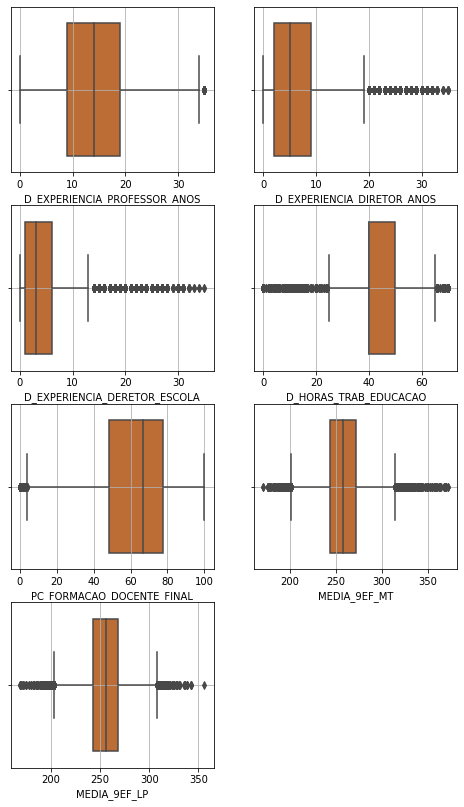

In [24]:
variableNumerics = ['D_EXPERIENCIA_PROFESSOR_ANOS','D_EXPERIENCIA_DIRETOR_ANOS','D_EXPERIENCIA_DERETOR_ESCOLA','D_HORAS_TRAB_EDUCACAO','PC_FORMACAO_DOCENTE_FINAL','MEDIA_9EF_MT','MEDIA_9EF_LP']

plt.figure(figsize=(8,14))
for index, column in enumerate(variableNumerics):
  plt.subplot(4,2, index+1)
  sns.boxplot(x=dataset[column], color="#D2691E")
  plt.grid()
plt.show()

# <font color='#FF8C00'>**MATEMÁTICA**</font>

In [25]:
mat = dataset.drop(columns=["ID_ESCOLA", "MEDIA_9EF_LP"], axis=1) 
mat.head()

,D_EXPERIENCIA_PROFESSOR_ANOS,D_EXPERIENCIA_DIRETOR_ANOS,D_EXPERIENCIA_DERETOR_ESCOLA,D_HORAS_TRAB_EDUCACAO,RECURSOS_FINANCEIROS,PROFESSORES_DISCIPLINAS,PESSOAL_ADMINISTRATIVO,APOIO_PEDAGOGICO,RECURSOS_PEDAGOGICOS,PROFESSORES_ASSIDUOS,...,P_EXPERIENCIA_PROFESSOR_ANOS,P_EXPERIENCIA_ESCOLA_ANOS,P_DEVER_CASA,P_ATIVIDADES_GRUPO,P_SITUACOES_APRENDIZAGEM,P_EXERICICIOS_FIXACAO,P_MODOS_RESOLVER_PROB,PC_FORMACAO_DOCENTE_FINAL,NIVEL_SOCIO_ECONOMICO,MEDIA_9EF_MT
0,5.0,4.0,4.0,40.0,C,C,B,B,C,C,...,A,B,E,C,F,F,F,48.9,Nível IV,244.94
1,5.0,4.0,4.0,40.0,C,C,B,B,C,C,...,G,F,E,E,E,F,F,48.9,Nível IV,244.94
2,20.0,4.0,4.0,40.0,C,B,C,C,C,C,...,B,B,E,C,F,F,F,36.5,Nível IV,241.78
3,20.0,4.0,4.0,40.0,C,B,C,C,C,C,...,D,D,F,E,F,F,F,36.5,Nível IV,241.78
4,7.0,9.0,9.0,40.0,B,C,C,C,B,C,...,E,E,F,E,F,F,F,55.6,Nível III,265.14


In [26]:
mat.shape

(45677, 28)

In [27]:
catNominal = ['INTERRUPCOES_CALENDARIO',
              'CONSELHO_ESCOLAR',
              'CONSELHO_CLASSE',
              'PREPARACAO_AVALIACAO_EXTERNA',
              'MERENDA',
              'METAS_APRENDIZAGEM',
              'AVALIACAO_APRENDIZAGEM',
              'AVALIACAO_LARGAESCALA',
              ]

catOrdinal = ['RECURSOS_FINANCEIROS',
              'NIVEL_SOCIO_ECONOMICO',
              'PROFESSORES_DISCIPLINAS',
              'PESSOAL_ADMINISTRATIVO',
              'APOIO_PEDAGOGICO',
              'RECURSOS_PEDAGOGICOS',
              'PROFESSORES_ASSIDUOS',
              'P_EXPERIENCIA_PROFESSOR_ANOS',
              'P_EXPERIENCIA_ESCOLA_ANOS',
              'P_DEVER_CASA',
              'P_ATIVIDADES_GRUPO',
              'P_SITUACOES_APRENDIZAGEM',
              'P_EXERICICIOS_FIXACAO',
              'P_MODOS_RESOLVER_PROB',
            ]

### <font color='#DEB887'>**TRANSFORMAÇÕES DE DADOS**</font>

In [28]:
label_encoder = LabelEncoder()

for index in catOrdinal:
    mat[index] = label_encoder.fit_transform(mat[index])


In [29]:
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
for index in catNominal:
    oneh = onehot_encoder.fit_transform(mat[[index]])
    novo = pd.DataFrame(oneh, columns=[index+str(int(i)) for i in range(oneh.shape[1])])    
    mat = pd.concat([mat, novo], axis=1)
    mat.drop(index, axis=1, inplace=True)

#for index in catNominal:
#    novo = pd.get_dummies(mat[index])
#    novo.columns = [index+str(i) for i in novo.columns.tolist()]
#    mat = pd.concat([mat, novo], axis=1)
#    mat.drop(index, axis=1, inplace=True)


In [30]:
mat.head()

,D_EXPERIENCIA_PROFESSOR_ANOS,D_EXPERIENCIA_DIRETOR_ANOS,D_EXPERIENCIA_DERETOR_ESCOLA,D_HORAS_TRAB_EDUCACAO,RECURSOS_FINANCEIROS,PROFESSORES_DISCIPLINAS,PESSOAL_ADMINISTRATIVO,APOIO_PEDAGOGICO,RECURSOS_PEDAGOGICOS,PROFESSORES_ASSIDUOS,...,PREPARACAO_AVALIACAO_EXTERNA1,MERENDA0,MERENDA1,METAS_APRENDIZAGEM0,METAS_APRENDIZAGEM1,METAS_APRENDIZAGEM2,AVALIACAO_APRENDIZAGEM0,AVALIACAO_APRENDIZAGEM1,AVALIACAO_LARGAESCALA0,AVALIACAO_LARGAESCALA1
0,5.0,4.0,4.0,40.0,2,2,1,1,2,2,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,5.0,4.0,4.0,40.0,2,2,1,1,2,2,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,20.0,4.0,4.0,40.0,2,1,2,2,2,2,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,20.0,4.0,4.0,40.0,2,1,2,2,2,2,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,7.0,9.0,9.0,40.0,1,2,2,2,1,2,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


### <font color='#DEB887'>**SEPARANDO A CLASSE ALVO DAS VARIÁVEIS PREDITORAS**</font>

In [31]:
X = mat.drop("MEDIA_9EF_MT", axis=1).values
y = mat[["MEDIA_9EF_MT"]].values.ravel()


### <font color='#DEB887'>**DIVIDINDO EM TREINO E TESTE**</font>

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)


### <font color='#DEB887'>**NORMALIZANDO OS DADOS**</font>

In [33]:
scaler_1 = MinMaxScaler()
scaler_2 = StandardScaler()

X_train = scaler_1.fit_transform(X_train)
X_test = scaler_1.fit_transform(X_test)

In [34]:
models = []
models.append(("LR", LinearRegression()))
models.append(("DT", DecisionTreeRegressor(random_state=42)))
models.append(("RF", RandomForestRegressor(random_state=42)))
models.append(("GBR", GradientBoostingRegressor(random_state=42)))
models.append(("EX", ExtraTreesRegressor(random_state=42)))

for index in models:
    name = index[0]
    model = index[1]
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1, error_score='raise')
    print("Name: {} => Mean R2-Score: {} Desvio R2-Score: {}".format(name, round(scores.mean(), 2), round(scores.std(),2)))

    model.fit(X_train,y_train)
    r2_train = r2_score(y_train, model.predict(X_train)).round(2)
    r2_test = r2_score(y_test, model.predict(X_test)).round(2)

    mae_train = mean_absolute_error(y_train, model.predict(X_train)).round(2)
    mae_test = mean_absolute_error(y_test, model.predict(X_test)).round(2)
    
    #model.score(X_test, y_test).round(2) retorna o coeficiente de determinação ou r2_score do teste
    
    #mse_train = mean_squared_error(y_train, model.predict(X_train)).round(2)
    #mse_test = mean_squared_error(y_test, model.predict(X_test)).round(2)

    #rmse_train = np.sqrt(mean_absolute_error(y_train, model.predict(X_train))).round(2)
    #rmse_test = np.sqrt(mean_absolute_error(y_test, model.predict(X_test))).round(2)

    print("R2-SCORE TREINO: {} \nR2-SCORE TESTE: {}".format(r2_train, r2_test))
    print("MAE TREINO: {} \nMAE TESTE: {}".format(mae_train, mae_test)) # O mais robusto para dados com outliers
    #print("MSE TREINO: {} MSE TESTE: {}".format(mse_train, mse_test))
    #print("RMSE TREINO: {} RMSE TESTE: {}".format(rmse_train, rmse_test))
    #print("\n")


Name: LR => Mean R2-Score: -13.87 Desvio R2-Score: 0.27
R2-SCORE TREINO: 0.31 
R2-SCORE TESTE: 0.32
MAE TREINO: 13.84 
MAE TESTE: 13.77
Name: DT => Mean R2-Score: -11.21 Desvio R2-Score: 0.46
R2-SCORE TREINO: 1.0 
R2-SCORE TESTE: 0.26
MAE TREINO: 0.0 
MAE TESTE: 10.46
Name: RF => Mean R2-Score: -9.87 Desvio R2-Score: 0.18
R2-SCORE TREINO: 0.95 
R2-SCORE TESTE: 0.61
MAE TREINO: 3.54 
MAE TESTE: 9.55


# <font color='#FF8C00'>**CORRELAÇÕES**</font>